In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [61]:
data = pd.read_csv("/Users/jp/python/diabetes/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
data.info()
#checking for nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [63]:
#no nulls records are present, as the no. of records are same.
#upon next we check for null values in featues
for i in data.columns:
    print(i, ":\t", len(data[data[i] == 0].index))

Pregnancies :	 111
Glucose :	 5
BloodPressure :	 35
SkinThickness :	 227
Insulin :	 374
BMI :	 11
DiabetesPedigreeFunction :	 0
Age :	 0
Outcome :	 500


In [64]:
data['Glucose'].replace(to_replace=0, value = data['Glucose'].mean(), inplace = True)
data['BloodPressure'].replace(to_replace=0, value = data['BloodPressure'].mean(), inplace=True)
data['SkinThickness'].replace(to_replace=0, value = data['SkinThickness'].mean(), inplace=True)
data['Insulin'].replace(to_replace=0, value = data['Insulin'].mean(), inplace=True)
data['BMI'].replace(to_replace=0, value = data['BMI'].mean(), inplace=True)
data['Age'].replace(to_replace=0, value = data['Age'].mean(), inplace=True)




In [65]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [66]:
'''dividing features and outcome(y)'''

X= data.drop('Outcome', axis=1).values
y= data['Outcome'].values
print(X.shape)
print(y.shape)


(768, 8)
(768,)


In [67]:
import numpy as np
from sklearn.model_selection import train_test_split

class StandardScaler:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
    
    def transform(self, X):
        scaled_X = (X - self.mean) / self.std
        return scaled_X
    
    def fit_transform(self, X):
        self.fit(X)
        scaled_X = self.transform(X)
        return scaled_X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [68]:
print("80% Features Training Data : ", X_train.shape)
print("20% Features Testing Data : ", X_test.shape)
print("80% Target Training Data : ", y_train.shape)
print("20% Target Testing Data : ", y_test.shape)

80% Features Training Data :  (614, 8)
20% Features Testing Data :  (154, 8)
80% Target Training Data :  (614,)
20% Target Testing Data :  (154,)


In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [70]:
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)
print(y_train_pred_knn.shape)
print(y_test_pred_knn.shape)

(614,)
(154,)


In [71]:
from sklearn.model_selection import KFold, cross_val_score

folds = KFold(n_splits=5, shuffle=False, random_state=None)
CrossValScoreKnn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=folds, verbose=1)
print("Cross-Validation Score of 5 folds : ", CrossValScoreKnn, "\n")
print("Average mean Cross-Validation Score 5 folds : ", np.mean(CrossValScoreKnn))
print("std Cross-Validation Score 5 folds : ", np.std(CrossValScoreKnn))

Cross-Validation Score of 5 folds :  [0.72357724 0.65853659 0.62601626 0.76422764 0.75409836] 

Average mean Cross-Validation Score 5 folds :  0.7052912168465947
std Cross-Validation Score 5 folds :  0.0541489285943024


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [72]:
from sklearn.metrics import accuracy_score

best_k = None
best_accuracy = 0.0
training_accuracies = []  
testing_accuracies = []  
K_values = np.arange(1,15)
for k in K_values:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    
    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    training_accuracies.append(train_accuracy)  # Append training accuracy to the array
    
    # Make predictions on the testing set
    y_test_pred = knn.predict(X_test)
    
    # Calculate testing accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    testing_accuracies.append(test_accuracy)  # Append testing accuracy to the array
    
    # Check if this k value gives a better testing accuracy
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_k = k

print("Best K value:", best_k)
print("Best Testing Accuracy:", best_accuracy)

# Now, 'training_accuracies' array contains training accuracies for each k value
# 'testing_accuracies' array contains testing accuracies for each k value


Best K value: 13
Best Testing Accuracy: 0.7792207792207793


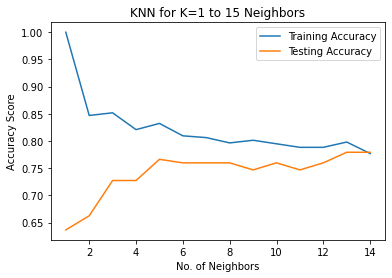

In [73]:
#plotting accuracies

plt.plot(neighbors, training_accuracy, label="Training Accuracy")
plt.plot(neighbors, testing_accuracy, label="Testing Accuracy")
plt.legend(loc=0)
plt.xlabel("No. of Neighbors")
plt.ylabel("Accuracy Score")
plt.title("KNN for K=1 to 15 Neighbors")
plt.show()

In [74]:
tuned_knn = KNeighborsClassifier(n_neighbors=best_k)
tuned_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [75]:
folds = KFold(n_splits=5, shuffle=False, random_state=None)
CrossValScore_knn = cross_val_score(estimator=tuned_knn, X=X_train, y=y_train, cv=folds, verbose=1)
print("Cross Validarion Score of 5 folds for K=13 : ", CrossValScore_knn, "\n")

print("Average Cross Validarion Score for K=13 : ", np.mean(CrossValScore_knn), "\n")

print("Training KNN Score for K=13 : ", tuned_knn.score(X_train, y_train), "\n")

print("Testing KNN Score for K=13 : ", tuned_knn.score(X_test, y_test), "\n")

Cross Validarion Score of 5 folds for K=13 :  [0.7398374  0.7804878  0.7398374  0.75609756 0.76229508] 

Average Cross Validarion Score for K=13 :  0.7557110489137678 

Training KNN Score for K=13 :  0.7980456026058632 

Testing KNN Score for K=13 :  0.7792207792207793 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [76]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

In [77]:
conf_matrix

array([[90,  9],
       [25, 30]])

In [83]:
#confusion matrix for k = 13

# Extract values from the confusion matrix
true_negatives = conf_matrix[0, 0]  # wrong pred
false_positives = conf_matrix[0, 1] 
false_negatives = conf_matrix[1, 0]
true_positives = conf_matrix[1, 1]

# Calculate accuracy
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

print("Accuracy:", accuracy)

#True negatives (TN) healthy individuals who tested "Negative" and are correctly classified as not having the disease.
#False positives (FP) healthy individuals who tested "Positive" but don't actually have the disease.
#False negatives (FN) individuals with the disease who tested "Negative" but should have tested "Positive."
#True positives (TP) individuals with the disease who tested "Positive" and are correctly classified as having the disease.

Accuracy: 0.7792207792207793


In [84]:
from sklearn.model_selection import LeaveOneOut
knn = KNeighborsClassifier(n_neighbors=best_k)

#cross-validator
loo = LeaveOneOut()

# Perform LOOCV
loocv_scores = cross_val_score(knn, X_scaled, y, cv=loo)

# Calculate mean and standard deviation of LOOCV scores
mean_loocv_score = loocv_scores.mean()
std_loocv_score = loocv_scores.std()

print("Mean LOOCV Score:", mean_loocv_score)
print("Standard Deviation of LOOCV Scores:", std_loocv_score)

Mean LOOCV Score: 0.7552083333333334
Standard Deviation of LOOCV Scores: 0.4299636107826129
